In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, f1_score
from matplotlib.colors import ListedColormap
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [298]:
df= pd.read_csv("pseudo_facebook 4.csv")

In [299]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [300]:
print(df.describe())

             userid           age       dob_day      dob_year     dob_month  \
count  9.900300e+04  99003.000000  99003.000000  99003.000000  99003.000000   
mean   1.597045e+06     37.280224     14.530408   1975.719776      6.283365   
std    3.440592e+05     22.589748      9.015606     22.589748      3.529672   
min    1.000008e+06     13.000000      1.000000   1900.000000      1.000000   
25%    1.298806e+06     20.000000      7.000000   1963.000000      3.000000   
50%    1.596148e+06     28.000000     14.000000   1985.000000      6.000000   
75%    1.895744e+06     50.000000     22.000000   1993.000000      9.000000   
max    2.193542e+06    113.000000     31.000000   2000.000000     12.000000   

             tenure  friend_count  friendships_initiated         likes  \
count  99001.000000  99003.000000           99003.000000  99003.000000   
mean     537.887375    196.350787             107.452471    156.078785   
std      457.649874    387.304229             188.786951    572.28

Numerical Variable: UserID, Age, Dob_day,tenure, friend_count, friendships_initiated, likes,likes_received,mobile_likes, mobile_likes_received, www_likes, www_likes_received

Categorical Variables: Gender, Dob_year, Dob_month

In [301]:
df["tenure"].fillna(df['tenure'].median(),inplace=True)
print(df.head())

    userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                 

In [302]:
df=df.dropna()

In [303]:
print(df.isnull().sum())

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64


In [215]:
#UNIVARIATE ANALYSIS 

#OUTLIER DETECTION

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mobile_likes'>

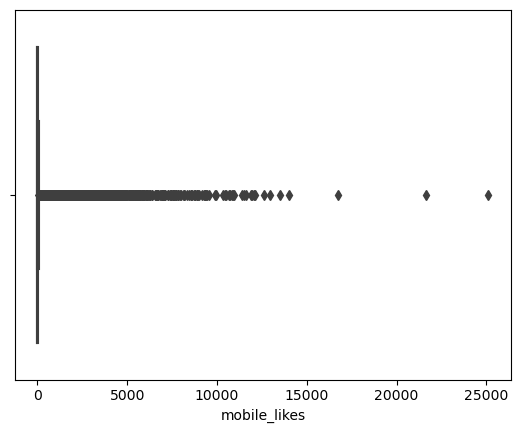

In [216]:
sns.boxplot(df['mobile_likes'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='www_likes'>

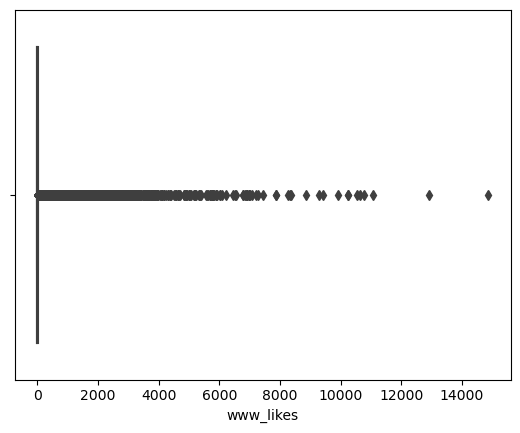

In [217]:
sns.boxplot(df['www_likes'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='www_likes_received'>

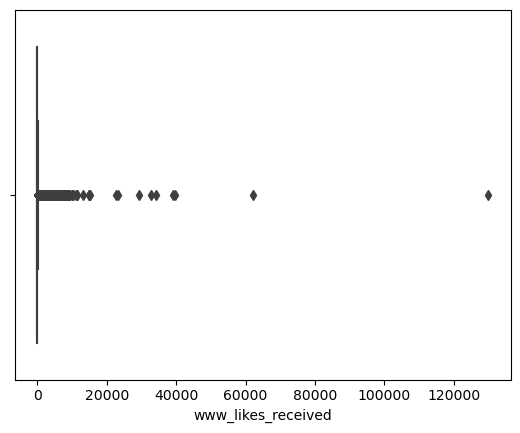

In [218]:
sns.boxplot(df['www_likes_received'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mobile_likes_received'>

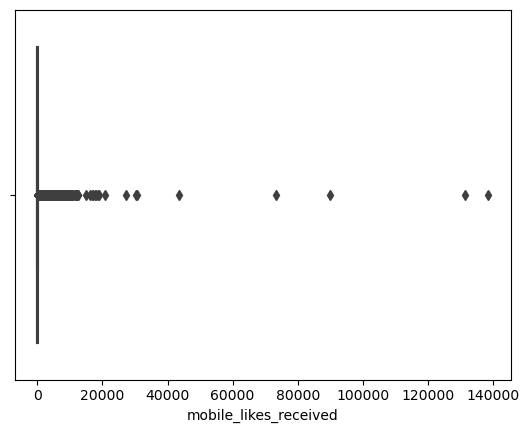

In [219]:
sns.boxplot(df['mobile_likes_received'])

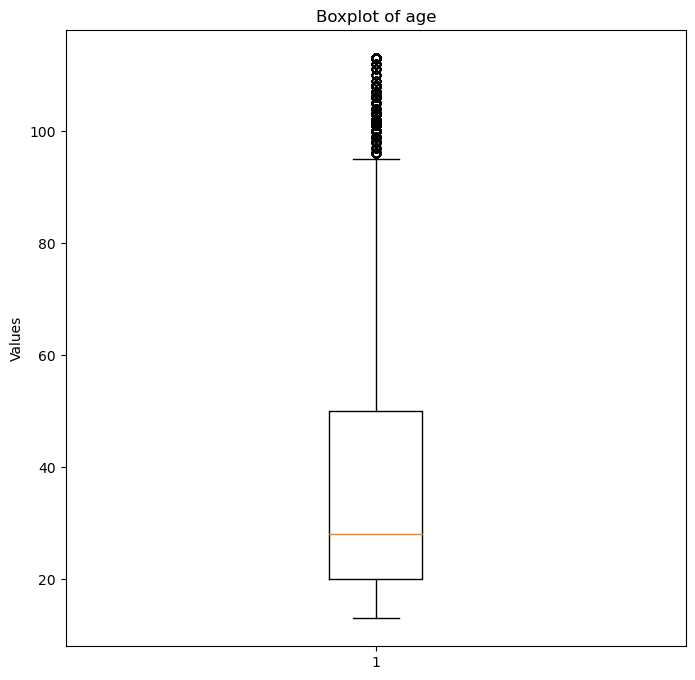

In [220]:
plt.figure(figsize=(8, 8))
plt.boxplot(df['age'])
plt.title('Boxplot of age')
plt.ylabel('Values')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dob_day'>

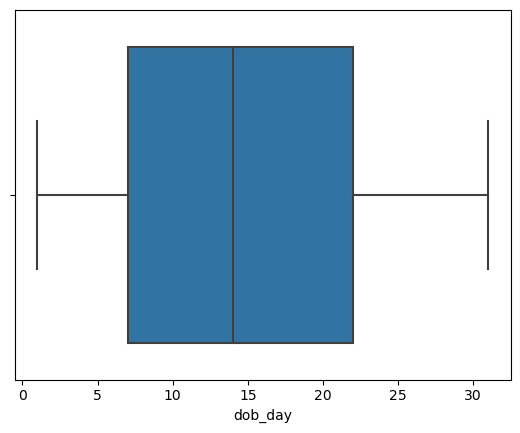

In [221]:
sns.boxplot(df['dob_day'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

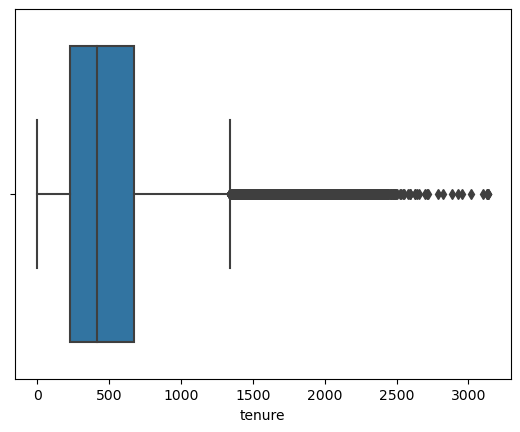

In [222]:
sns.boxplot(df['tenure'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='friend_count'>

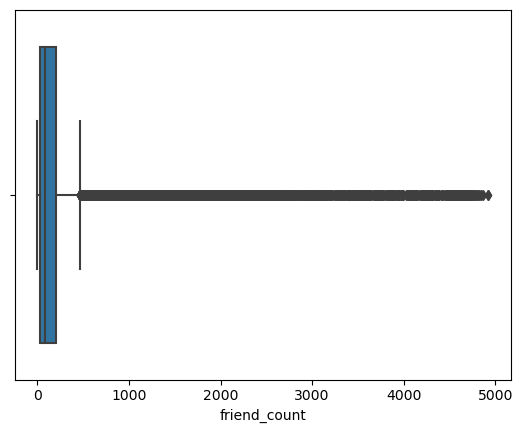

In [223]:
sns.boxplot(df['friend_count'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='friendships_initiated'>

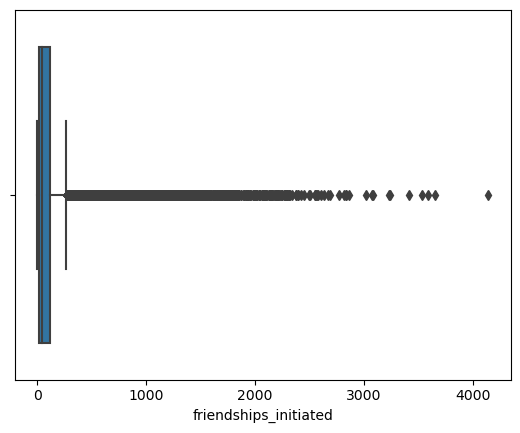

In [224]:
sns.boxplot(df['friendships_initiated'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='likes'>

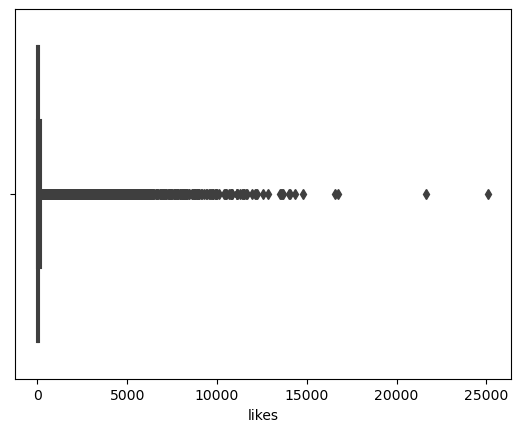

In [225]:
sns.boxplot(df['likes'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='likes_received'>

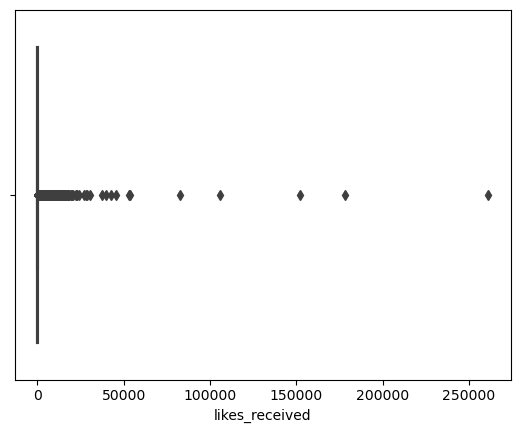

In [226]:
sns.boxplot(df['likes_received'])

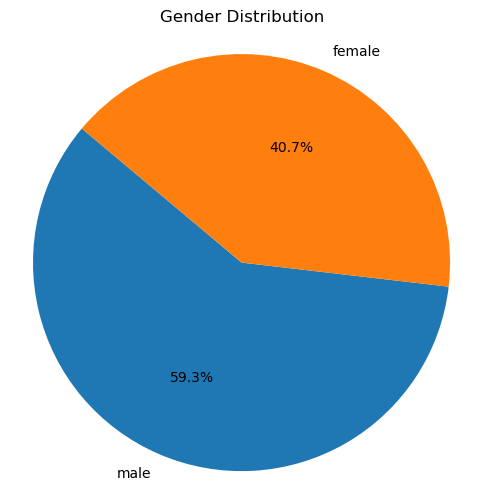

In [227]:
#Categorical Variables

gender_counts = df['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Gender Distribution')
plt.show()

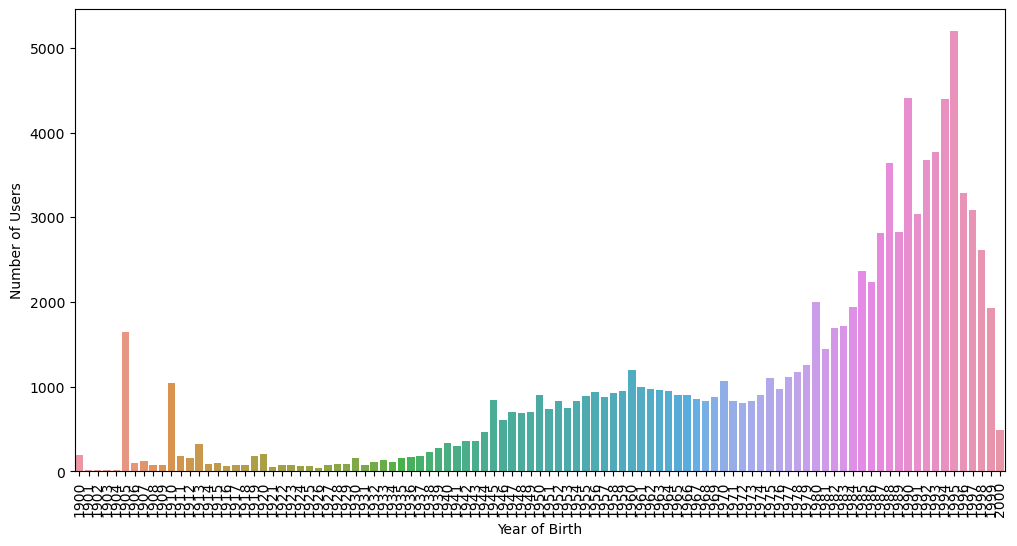

In [228]:
plt.figure(figsize =(12,6))
sns.countplot(data=df, x='dob_year')
plt.xlabel("Year of Birth")
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

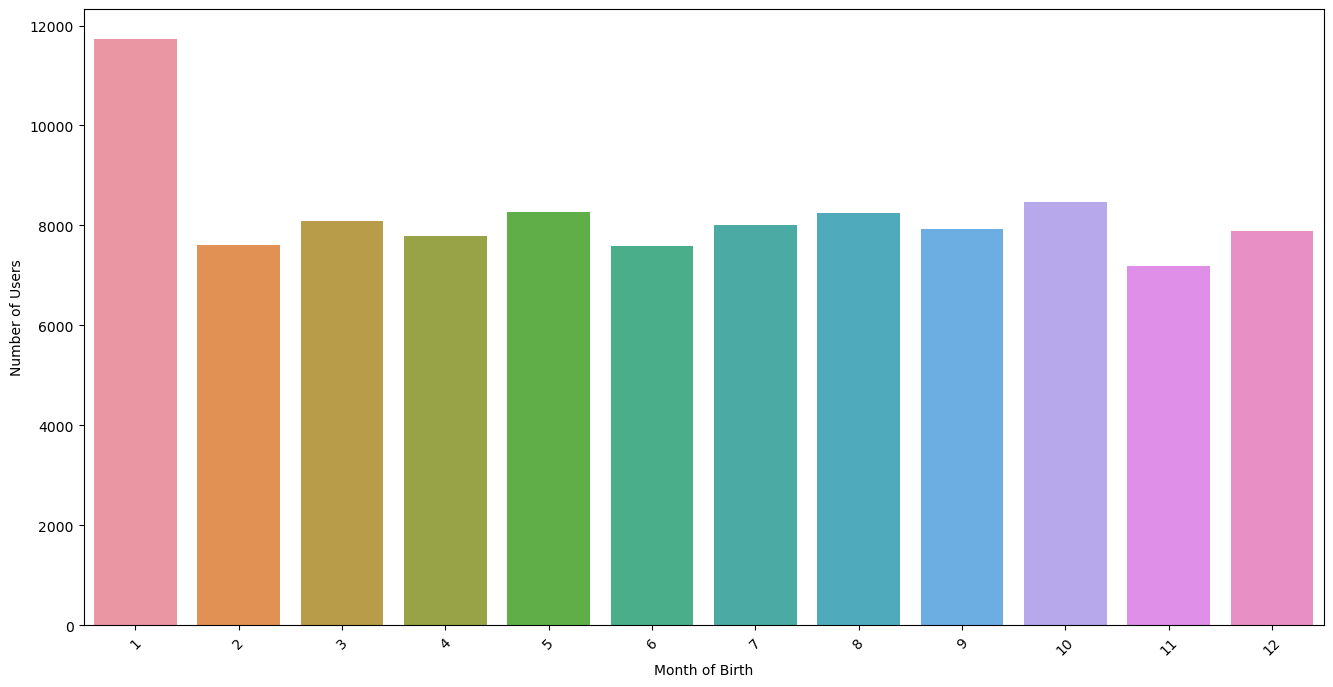

In [229]:
plt.figure(figsize =(16,8))
sns.countplot(data=df, x='dob_month')
plt.xlabel("Month of Birth")
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

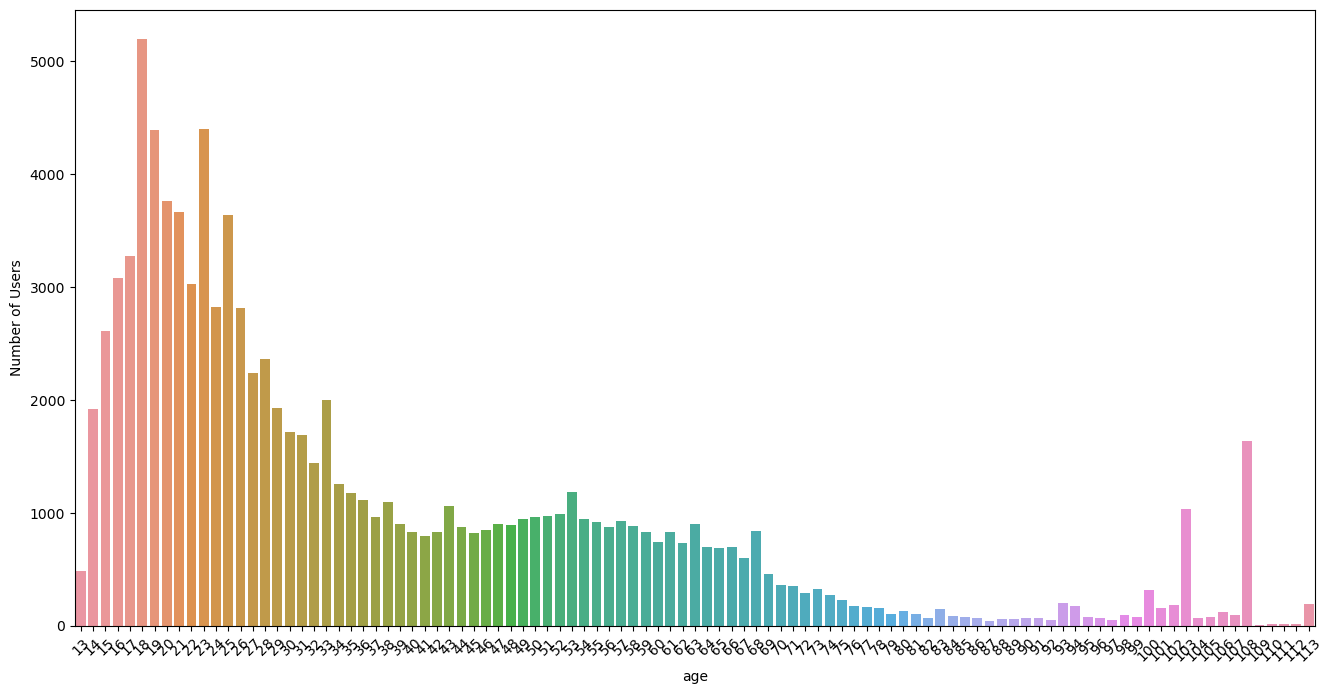

In [230]:
plt.figure(figsize =(16,8))
sns.countplot(data=df, x='age')
plt.xlabel("age")
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

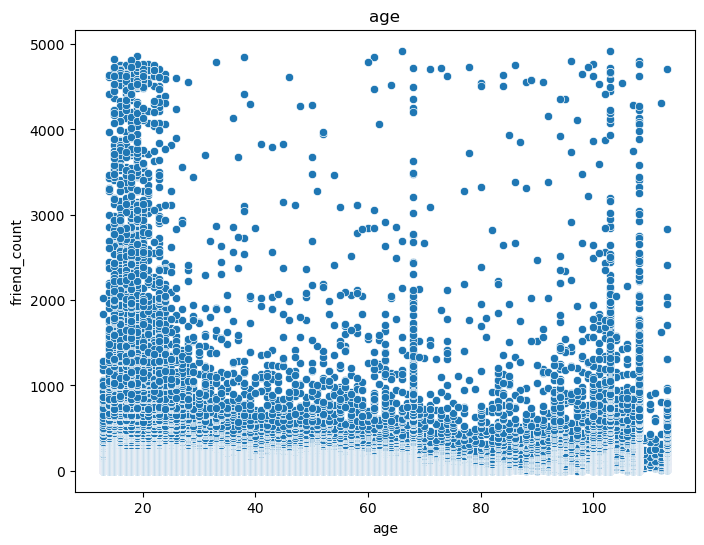

In [231]:
#BIVARIATE ANALYSIS
#SCATTER PLOTS

plt.figure(figsize=(8, 6))
sns.scatterplot(data= df,x='age', y='friend_count' )
plt.title('age')
plt.ylabel('friend_count')
plt.show()

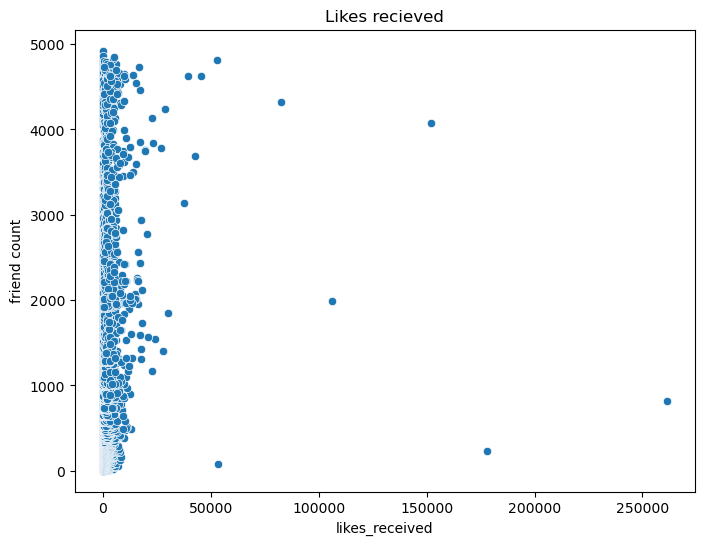

In [232]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data= df,x='likes_received', y='friend_count' )
plt.title('Likes recieved')
plt.ylabel('friend count')
plt.show()

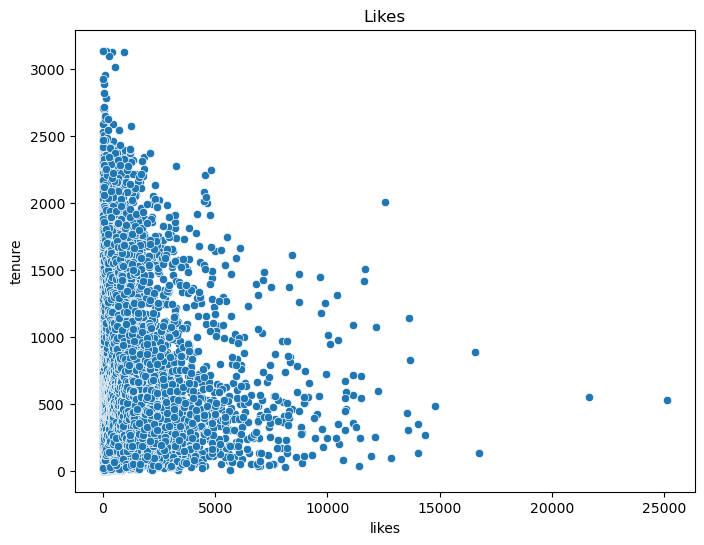

In [233]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data= df,x='likes', y='tenure' )
plt.title('Likes')
plt.ylabel('tenure')
plt.show()

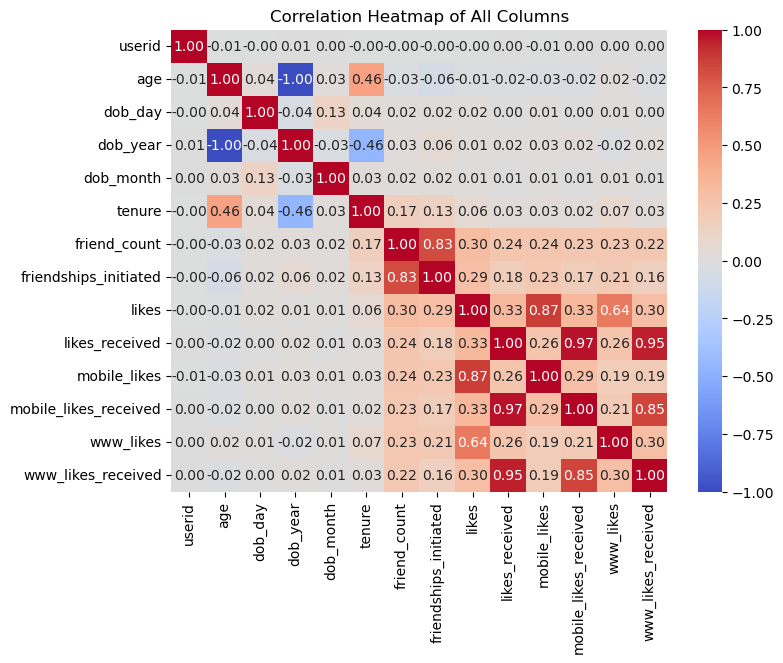

In [234]:
#MULTIVARIATE ANALYSIS

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Columns')
plt.show()


Moderate Correlation between variables:

mobile_likes_recieved and www_likes_recieved (0.85),
friend_count and friend_count_initiated(0.83),
mobile_likes and likes (0.87),
www_likes and likes(0.64)


Large correlation between Variables:

mobile_likes_recieved and likes_recieved(0.97),
www_likes_recieved and likes_recieved (0.95)


No correlation between varaibles:

dob_year and age(-1)

In [304]:
encoded_df = pd.get_dummies(df,columns=None)
encoded_df.head()

userid  age  dob_day  dob_year  dob_month  tenure  friend_count  \
0  2094382   14       19      1999         11   266.0             0   
1  1192601   14        2      1999         11     6.0             0   
2  2083884   14       16      1999         11    13.0             0   
3  1203168   14       25      1999         12    93.0             0   
4  1733186   14        4      1999         12    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  gender_female  \
0                      0          0                   0              0   
1                      0          0                   0              1   
2                      0          0                   0              0   
3                      0          0                   0              1   
4                      0          0                   0              0   

   gender_male  
0            1  
1            0  
2            1  
3            0  
4            1

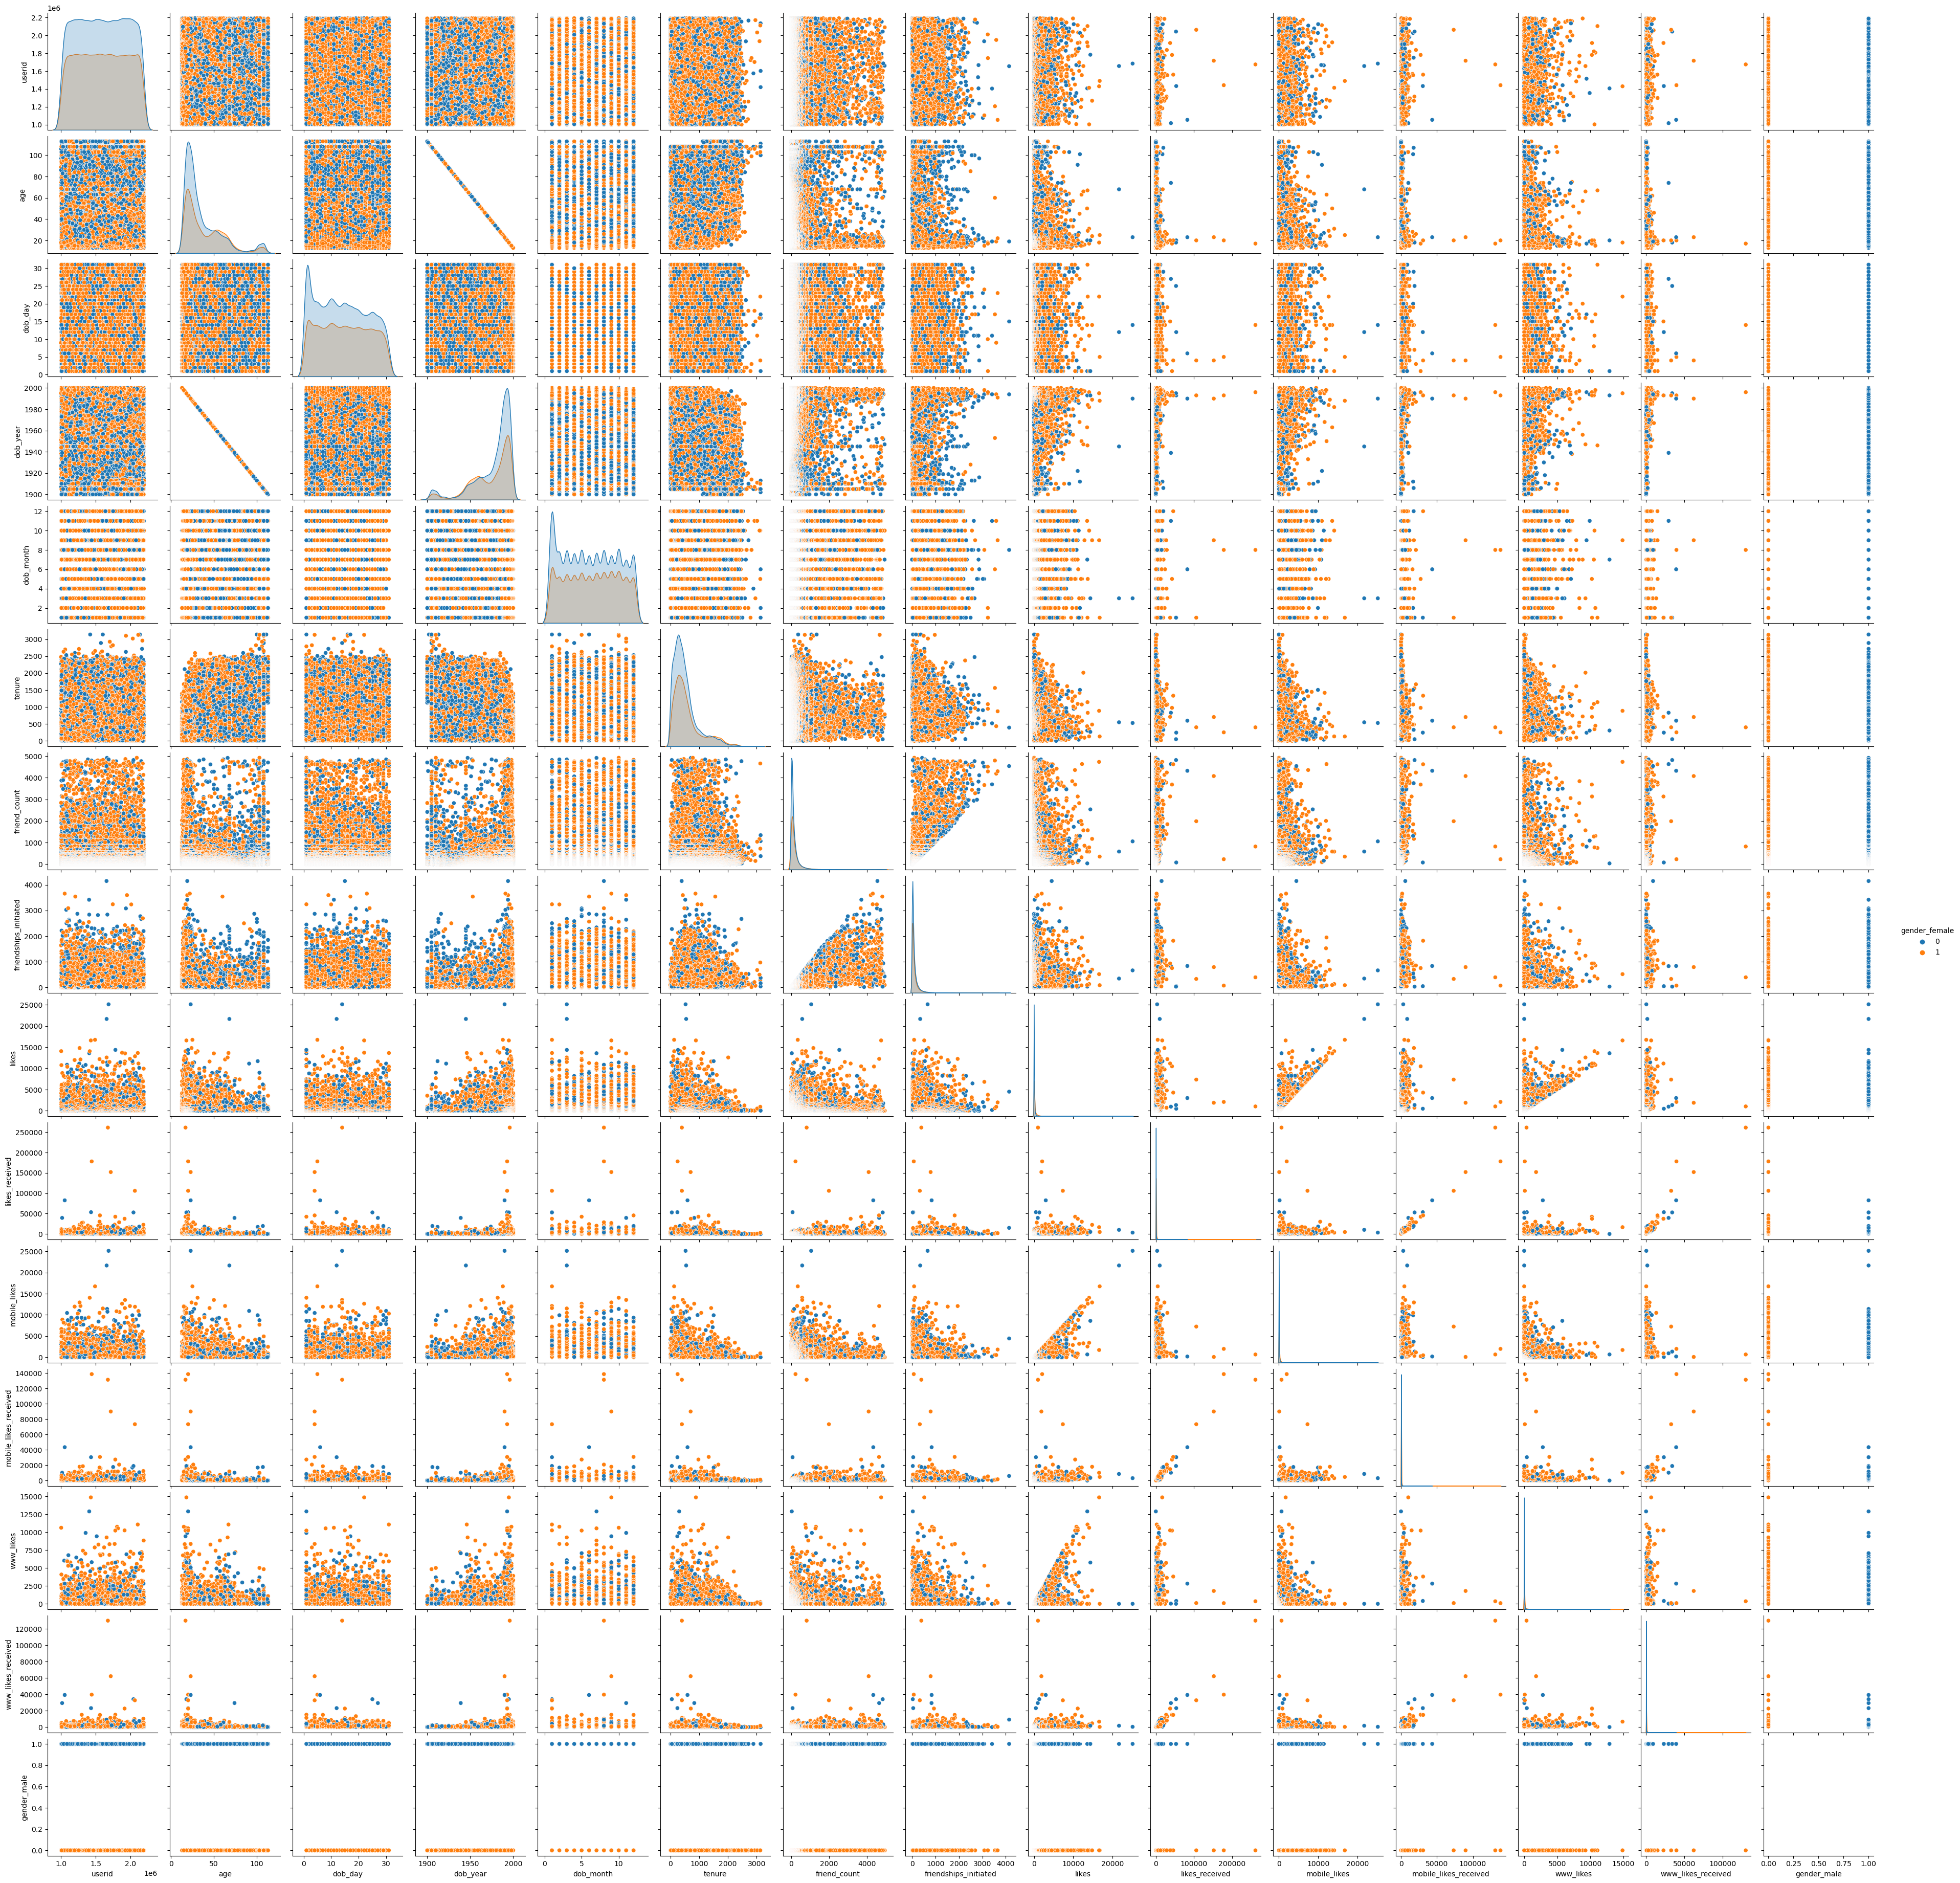

In [236]:
sns.pairplot(data = encoded_df, hue="gender_female")

<AxesSubplot:xlabel='age', ylabel='count'>

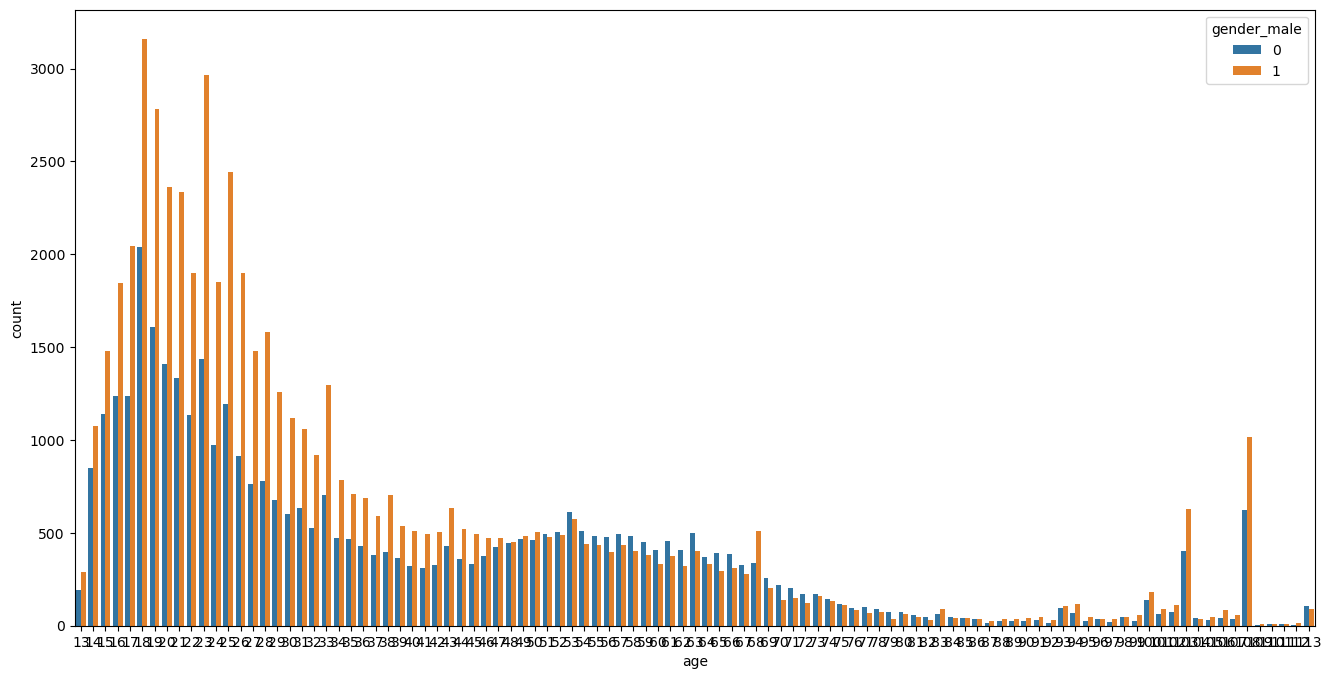

In [237]:
plt.figure(figsize=(16,8))
sns.countplot(x='age',hue='gender_male',data=encoded_df)


<AxesSubplot:xlabel='gender_male', ylabel='likes'>

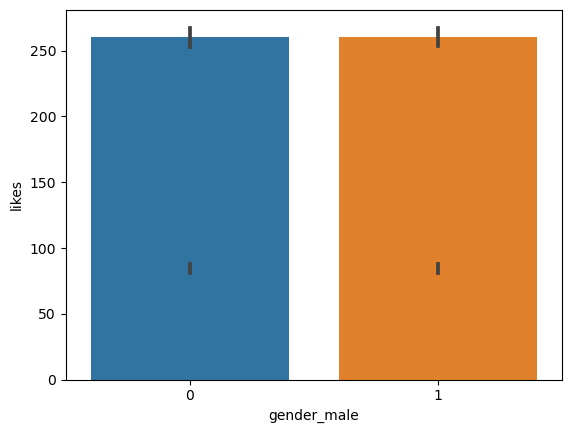

In [238]:
sns.barplot(x ='gender_female', y= 'likes', data=encoded_df)
sns.barplot(x ='gender_male', y= 'likes', data=encoded_df)

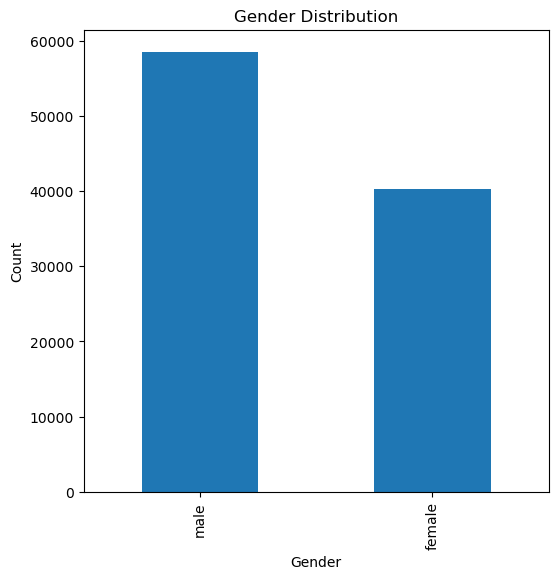

In [239]:
# Calculate the count of each gender
gender_counts = df['gender'].value_counts()

# Create the bar plot
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

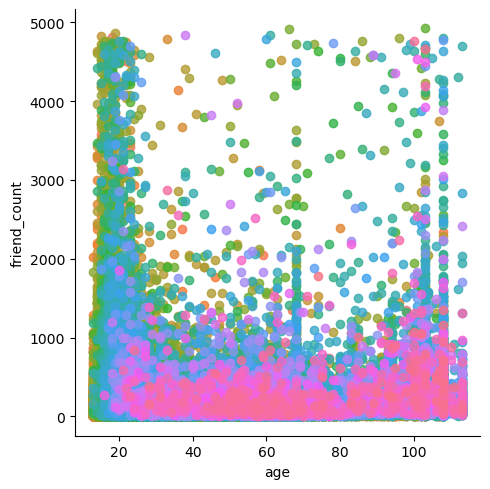

In [240]:
sns.lmplot( x="age", y="friend_count", data=df, fit_reg=False, hue='tenure', legend=False)

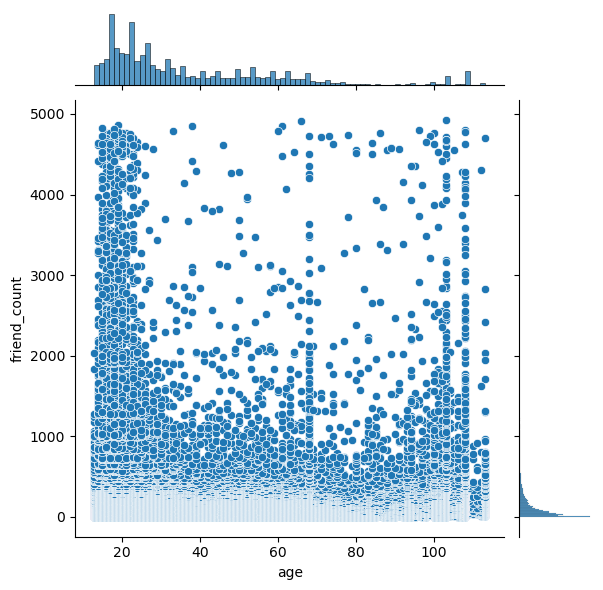

In [241]:
sns.jointplot(x='age',y='friend_count',data=df)

<AxesSubplot:xlabel='likes', ylabel='friend_count'>

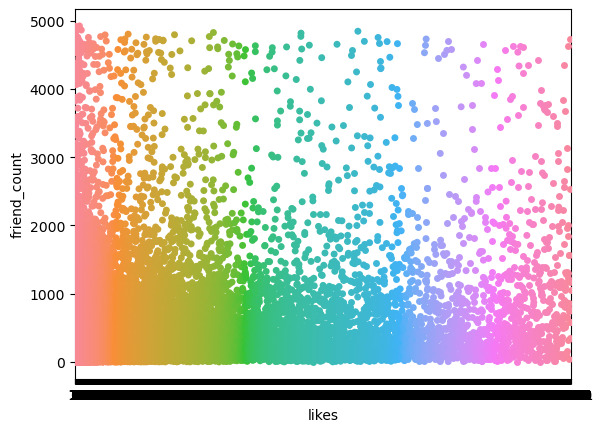

In [242]:
sns.stripplot(x='likes',y='friend_count',data=df,jitter=False)

In [243]:
#STATISTICAL ANALYSIS AND HYPOTHESIS TESTING

#for categorical variable
##Chi-Square Test for Independence
#H0 : gender and dob_year are independent
#H1 : gender and dob_year are not independent

chi_stat,p_value,dof,arr = chi2_contingency(observed=pd.crosstab(df['gender'],df['dob_year']))
print("Chi-Square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
alpha = 0.05
if p_value > alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to Reject the null hypothesis")

Chi-Square Statistic: 2200.435885316447
P-value: 0.0
Degrees of Freedom: 100
Failed to Reject the null hypothesis


In [244]:
#T-TEST
#H0 : Population mean of the likes= Population mean of the likes_received

#H1 : Population mean of the likes != Population mean of the likes_received

likes_mean = np.mean(df['likes'])
likes_received_mean = np.mean(df['likes_received'])
print("likes mean value:",likes_mean)
print("likes_received mean value:",likes_received_mean)
likes_std = np.std(df['likes'])
likes_received_std = np.std(df['likes_received'])
print("likes std value:",likes_std)
print("likes_received std value:",likes_received_std)
ttest,pval = ttest_ind(df['likes'],df['likes_received'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


likes mean value: 156.10989800461408
likes_received mean value: 142.66334439632493
likes std value: 572.5450013570227
likes_received std value: 1388.9690668718147
p-value 0.0048978657655678595
we reject null hypothesis


In [245]:
#FEATURE TRANSFORMATION AND EXTRACTION

In [246]:

encoder= LabelEncoder()
df['gender']= encoder.fit_transform(df['gender'])

print(df)


        userid  age  dob_day  dob_year  dob_month  gender  tenure  \
0      2094382   14       19      1999         11       1   266.0   
1      1192601   14        2      1999         11       0     6.0   
2      2083884   14       16      1999         11       1    13.0   
3      1203168   14       25      1999         12       0    93.0   
4      1733186   14        4      1999         12       1    82.0   
...        ...  ...      ...       ...        ...     ...     ...   
98998  1268299   68        4      1945          4       0   541.0   
98999  1256153   18       12      1995          3       0    21.0   
99000  1195943   15       10      1998          5       0   111.0   
99001  1468023   23       11      1990          4       0   416.0   
99002  1397896   39       15      1974          5       0   397.0   

       friend_count  friendships_initiated  likes  likes_received  \
0                 0                      0      0               0   
1                 0              

In [247]:
#FEATURE TRANSFORMATION
#Dropping irrelavant and highly correlated columns (as seen in the correlation heatmap)

df.drop(["likes_received", 'mobile_likes_received', 'www_likes_received','mobile_likes','www_likes'], axis=1, inplace=True)
print(df)

        userid  age  dob_day  dob_year  dob_month  gender  tenure  \
0      2094382   14       19      1999         11       1   266.0   
1      1192601   14        2      1999         11       0     6.0   
2      2083884   14       16      1999         11       1    13.0   
3      1203168   14       25      1999         12       0    93.0   
4      1733186   14        4      1999         12       1    82.0   
...        ...  ...      ...       ...        ...     ...     ...   
98998  1268299   68        4      1945          4       0   541.0   
98999  1256153   18       12      1995          3       0    21.0   
99000  1195943   15       10      1998          5       0   111.0   
99001  1468023   23       11      1990          4       0   416.0   
99002  1397896   39       15      1974          5       0   397.0   

       friend_count  friendships_initiated  likes  
0                 0                      0      0  
1                 0                      0      0  
2              

In [248]:
X = df.drop('gender', axis = 1)
y = df['gender']

df_feature = X
df_num = df_feature.select_dtypes(include = [np.number])

In [249]:

# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df = pd.DataFrame(num_scaled, columns = df_num.columns)

df.head()

userid       age   dob_day  dob_year  dob_month    tenure  friend_count  \
0  1.445623 -1.030561  0.495575  1.030561   1.335965 -0.593607     -0.506821   
1 -1.175754 -1.030561 -1.390415  1.030561   1.335965 -1.165977     -0.506821   
2  1.415107 -1.030561  0.162754  1.030561   1.335965 -1.150567     -0.506821   
3 -1.145037 -1.030561  1.161219  1.030561   1.619294 -0.974453     -0.506821   
4  0.395666 -1.030561 -1.168534  1.030561   1.619294 -0.998669     -0.506821   

   friendships_initiated    likes  
0              -0.569096 -0.27266  
1              -0.569096 -0.27266  
2              -0.569096 -0.27266  
3              -0.569096 -0.27266  
4              -0.569096 -0.27266

In [251]:
#BASE MODEL BUILDING

#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 42)

model_LR.fit(X_train, y_train )

predictions = model_LR.predict(X_test)

print("Accuracy", accuracy_score(y_test, predictions))


Accuracy 0.6344227461297177


In [ ]:
#HYPER PARAMETER TUNING USING RANDOMIZED SEARCH CV ON LOGISTIC REGRESSION

In [252]:
params_dist_LR={
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

In [253]:

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model_LR, param_distributions=params_dist_LR, n_iter=10, cv=5, random_state=42)

# Fit the model and perform the hyperparameter search
random_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best hyperparameters found: ", random_search.best_params_)



Best hyperparameters found:  {'penalty': 'l2', 'C': 0.01}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [254]:
# Get the best model and print the best hyperparameters
from sklearn.metrics import accuracy_score, classification_report
bestLR_model = random_search.best_estimator_
print("Best Hyperparameters for Logistic Regression: ", random_search.best_params_)

# Predict using the best model
y_pred_LR= bestLR_model.predict(X_test)

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy: ", accuracy_LR)
print("Classification Report:\n", classification_report(y_test, y_pred_LR))


Best Hyperparameters for Logistic Regression:  {'penalty': 'l2', 'C': 0.01}
Accuracy:  0.6344227461297177
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.20      0.31     12010
           1       0.63      0.93      0.75     17639

    accuracy                           0.63     29649
   macro avg       0.65      0.57      0.53     29649
weighted avg       0.64      0.63      0.57     29649



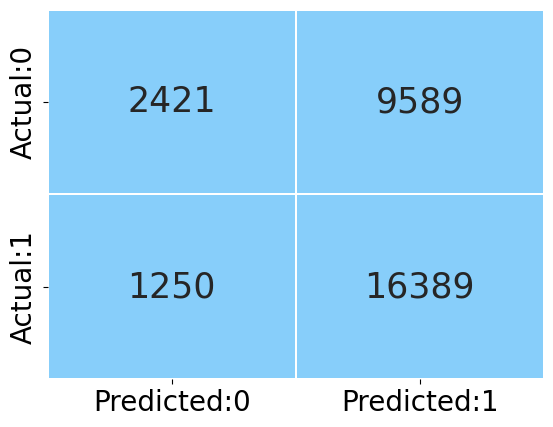

In [255]:

cm = confusion_matrix(y_test, predictions)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()


In [256]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision


0.6308799753637694

In [257]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.9291343046657974

In [258]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.6344227461297177

In [260]:
#MODEL-2 RANDOM FOREST CLASSIFIER USING RANDOMIZED SEARCH CV

model_RF= RandomForestClassifier()
model_RF.fit(X_train, y_train )

y_pred_RF = model_RF.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_RF))


Accuracy 0.6843401126513542


In [261]:
#HYPERPARAMETER TUNING FOR RANDOM FOREST


# Define hyperparameters and their ranges
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

In [262]:
from sklearn.model_selection import  RandomizedSearchCV
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model_RF, param_distributions=param_dist, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model using the randomized search
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, scoring='accuracy', verbose=1)

In [263]:
# Get the best model and print the best hyperparameters
from sklearn.metrics import accuracy_score, classification_report
bestRF_model = random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting: ", random_search.best_params_)

# Predict using the best model
y_pred_RF = bestRF_model.predict(X_test)

# Evaluate the model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy: ", accuracy_RF)
print("Classification Report:\n", classification_report(y_test, y_pred_RF))


Best Hyperparameters for Gradient Boosting:  {'n_estimators': 150, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_depth': 15, 'bootstrap': True}
Accuracy:  0.6913555263246652
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.49      0.56     12010
           1       0.71      0.83      0.76     17639

    accuracy                           0.69     29649
   macro avg       0.68      0.66      0.66     29649
weighted avg       0.69      0.69      0.68     29649



In [265]:
#MODEL-3 GRADIENT BOOSTING 

model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train )

y_pred_GB = model_GB.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_GB))



Accuracy 0.6900738642112719


In [266]:

#HYPERPARAMETER TUNING FOR GRADIENT BOOSTING
params_dist_GB={
            'n_estimators': np.arange(10, 200, 10),
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'max_depth': [3, 5, 7, 9]
        }

In [267]:
from sklearn.model_selection import  RandomizedSearchCV
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model_GB, param_distributions=params_dist_GB, n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model using the randomized search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, scoring='accuracy', verbose=1)

In [268]:

bestGB_model = random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting: ", random_search.best_params_)

# Predict using the best model
y_pred_GB = bestGB_model.predict(X_test)

# Evaluate the model
accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("Accuracy: ", accuracy_GB)
print("Classification Report:\n", classification_report(y_test, y_pred_GB))


Best Hyperparameters for Gradient Boosting:  {'n_estimators': 160, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy:  0.6933792033458127
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.49      0.56     12010
           1       0.71      0.83      0.76     17639

    accuracy                           0.69     29649
   macro avg       0.69      0.66      0.66     29649
weighted avg       0.69      0.69      0.68     29649



In [270]:
#MODEL-4 NAIVE BAYES CLASSIFIER 


model_NB = GaussianNB()
model_NB.fit(X_train, y_train )

y_pred_NB = model_NB.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_NB))


Accuracy 0.6176599548045465


In [271]:

#HYPERPARAMETER TUNING FOR NAIVE BAYES

params_dist_NB={
        'priors': [None],
        'var_smoothing': np.logspace(0, -9, num=100)  # Hyperparameter for GaussianNB

        }

In [272]:
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model_NB, param_distributions=params_dist_NB, n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model using the randomized search
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'priors': [None],
                                        'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, scoring='accuracy', verbose=1)

In [273]:
# Get the best model and print the best hyperparameters
from sklearn.metrics import accuracy_score, classification_report
bestNB_model = random_search.best_estimator_
print("Best Hyperparameters for Naive Bayes: ", random_search.best_params_)

# Predict using the best model
y_pred_NB = bestNB_model.predict(X_test)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Accuracy: ", accuracy_NB)
print("Classification Report:\n", classification_report(y_test, y_pred_NB))


Best Hyperparameters for Naive Bayes:  {'var_smoothing': 1.232846739442066e-07, 'priors': None}
Accuracy:  0.6205942864852103
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.16      0.25     12010
           1       0.62      0.94      0.75     17639

    accuracy                           0.62     29649
   macro avg       0.62      0.55      0.50     29649
weighted avg       0.62      0.62      0.55     29649



In [274]:
#TRY GRID SEARCH HERE

# Create a GridSearchCV object
grid_search = GridSearchCV(model_NB, params_dist_NB, scoring='accuracy', cv=5)

# Fit the model using Grid Search
grid_search.fit(X_train, y_train)

# Get the best model and print the best hyperparameters
best_naive_bayes = grid_search.best_estimator_
print("Best Hyperparameters: ", grid_search.best_params_)

# Predict using the best model
y_pred = best_naive_bayes.predict(X_test)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_NB)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters:  {'priors': None, 'var_smoothing': 1.519911082952933e-07}
Accuracy:  0.619987183378866
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.15      0.25     12010
           1       0.62      0.94      0.75     17639

    accuracy                           0.62     29649
   macro avg       0.62      0.55      0.50     29649
weighted avg       0.62      0.62      0.54     29649



In [276]:
#MODEL-5 K NEIGHBORS CLASSIFIER


model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train )

y_pred_KNN = model_KNN.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_KNN))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy 0.5825491584876387


In [277]:

#HYPERPARAMETER TUNING FOR KNN
params_dist_KNN={
            'n_neighbors': np.arange(1, 21),         # Number of neighbors to use for kneighbors queries
            'weights': ['uniform', 'distance'],      # Weight function used in prediction
            'p': [1, 2]                               # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
        }


In [280]:
from sklearn.model_selection import  RandomizedSearchCV
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model_KNN, param_distributions=params_dist_KNN, n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model using the randomized search
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [281]:
# Get the best model and print the best hyperparameters
from sklearn.metrics import accuracy_score, classification_report
bestKNN_model = random_search.best_estimator_
print("Best Hyperparameters for K Neighbors: ", random_search.best_params_)

# Predict using the best model
y_pred_KNN = bestKNN_model.predict(X_test)

# Evaluate the model
accuracy_KNN= accuracy_score(y_test, y_pred_KNN)
print("Accuracy: ", accuracy_KNN)
print("Classification Report:\n", classification_report(y_test, y_pred_KNN))


Best Hyperparameters for K Neighbors:  {'weights': 'distance', 'p': 1, 'n_neighbors': 19}
Accuracy:  0.6018078181388917
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.21      0.30     12010
           1       0.62      0.87      0.72     17639

    accuracy                           0.60     29649
   macro avg       0.57      0.54      0.51     29649
weighted avg       0.58      0.60      0.55     29649



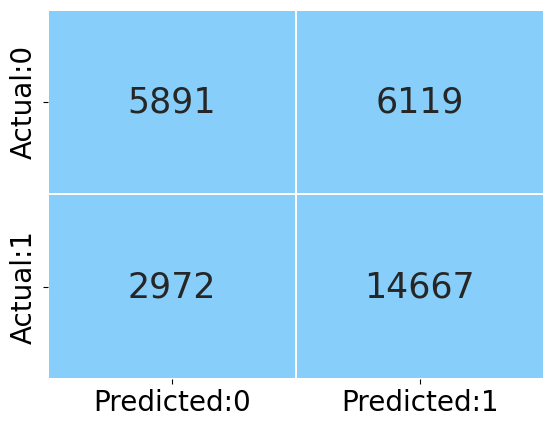

In [283]:
#FINAL MODEL CHOSEN:  GRADIENT BOOSTING CLASSIFIER WITH RANDOMIZED SEARCH (ACCURACY=70%)


cm = confusion_matrix(y_test, y_pred_GB)

# label the confusion matrix
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [284]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [285]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.7056191667468489

In [286]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.8315097227733999

In [287]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.49050791007493755

In [288]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.7634092387768382

In [289]:
# calculate the accuracy
accuracy_GB = accuracy_score(y_test, y_pred_GB)

# print the accuracy
accuracy_GB

0.6933792033458127

In [290]:
# calculate various performance measures
acc_table_GB = classification_report(y_test, y_pred_GB)

# print the table
print(acc_table_GB)

              precision    recall  f1-score   support

           0       0.66      0.49      0.56     12010
           1       0.71      0.83      0.76     17639

    accuracy                           0.69     29649
   macro avg       0.69      0.66      0.66     29649
weighted avg       0.69      0.69      0.68     29649



In [292]:
from sklearn.metrics import cohen_kappa_score


# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_GB)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.3360686927394966


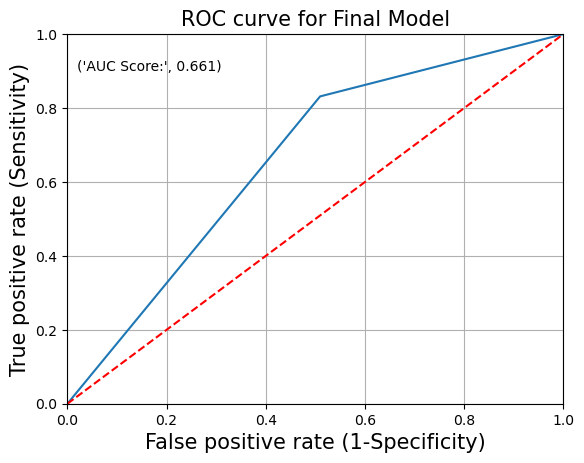

In [295]:
from sklearn import metrics


fpr, tpr, thresholds = roc_curve(y_test, y_pred_GB)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Final Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_GB),4)))

# plot the grid
plt.grid(True)